# Data Sourcing

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load the data
df = pd.read_csv("Customer-Churn.csv")

In [3]:
# Explore the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
churnRate = df["Churn"].value_counts()
churnRate

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### **Report:** It seems out of 7043 customers 1869 were churned and the rest were not churned

In [8]:
churnRatePercent = churnRate/len(df) * 100
churnRatePercent

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

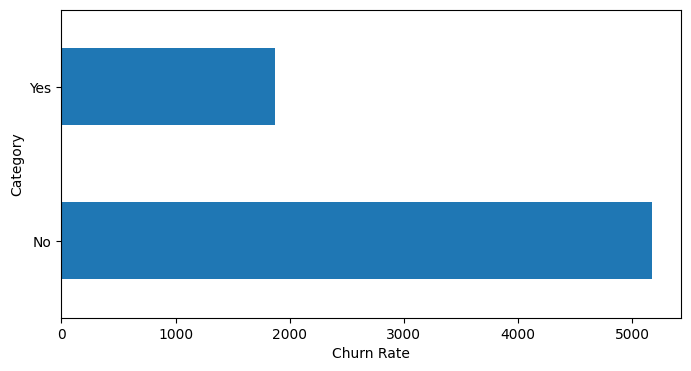

In [9]:
churnRate.plot(kind="barh", figsize=(8, 4))
plt.xlabel("Churn Rate")
plt.ylabel("Category")
plt.show()

# Data Cleaning

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


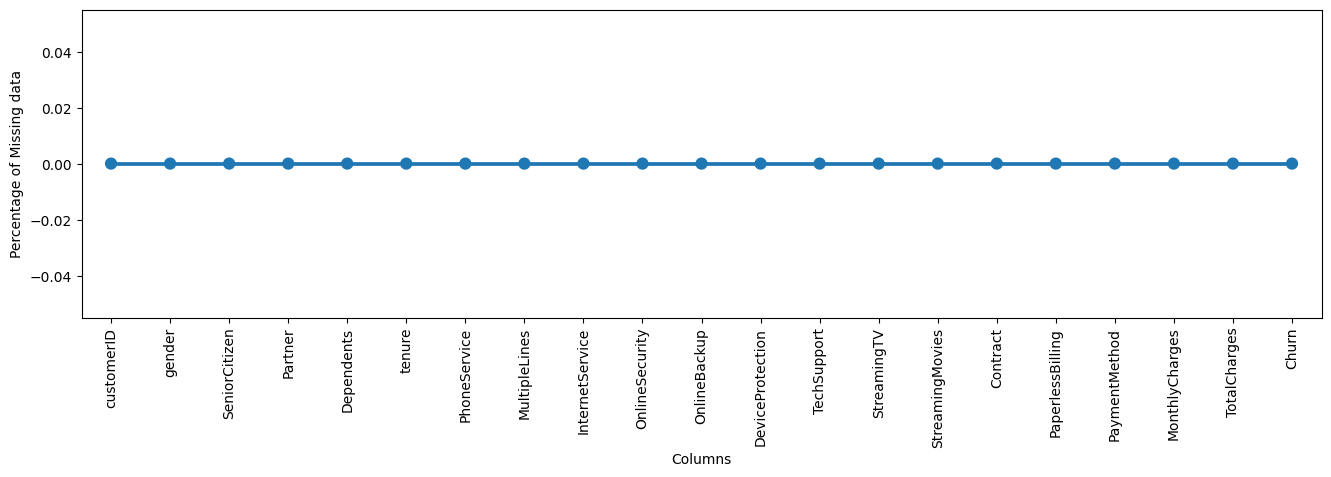

In [10]:
# Handling missing values
missingData = df.isnull().sum()

plt.figure(figsize=(16, 4))
sns.pointplot(x=missingData.index, y=missingData.values)
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing data")
plt.xticks(rotation= 90)
plt.show()

In [11]:
# Let's make a copy of df to perform data cleaning and further processess.
newDf = df.copy()
newDf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# As per the df, TotalCharges are supposed to be numerical type instead of object. Let's convert into numerical.
newDf["TotalCharges"] = pd.to_numeric(newDf["TotalCharges"], errors="coerce")

In [13]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# Now check the newDf info to check the null values
newDf.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


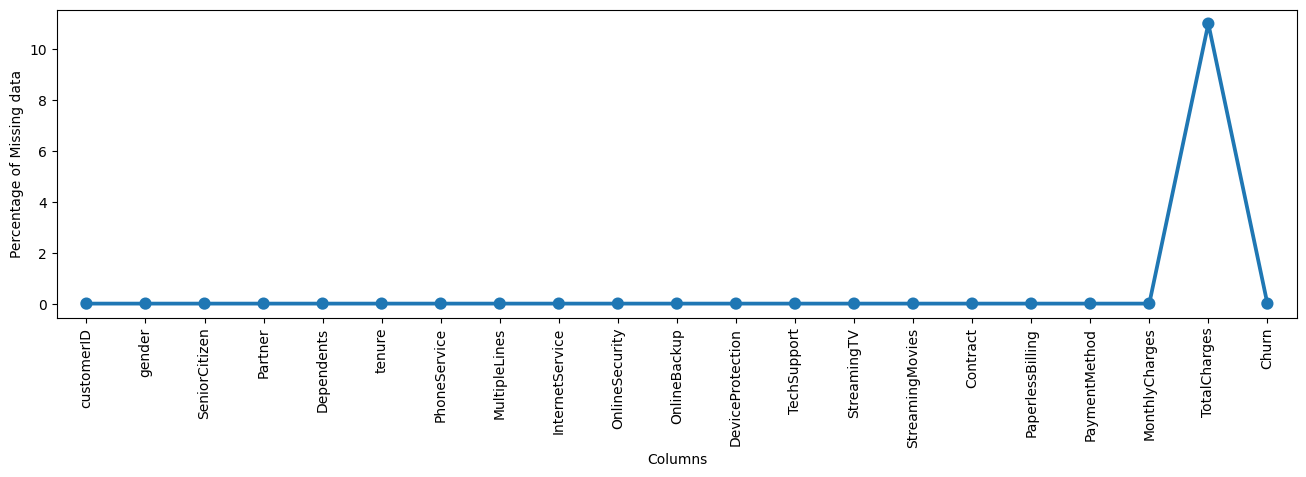

In [15]:
# Let's plot the missing data in newDf
missingData = newDf.isnull().sum()

plt.figure(figsize=(16, 4))
sns.pointplot(x=missingData.index, y=missingData.values)
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing data")
plt.xticks(rotation= 90)
plt.show()

In [16]:
# There are 11 null values in TotalCharges column. Out of 7043 rows, deleting 11 rows won't make any big impact. Let's delete the rows with null values
newDf.dropna(inplace=True)
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [17]:
# When seeing the data, tenure column has continuous values and it can make the insights unclear. So let's group them
newDf["tenure"].max()

72

In [18]:
bins = [0, 12, 24, 36, 48, 60, 72] 
labels = ['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

newDf['tenure_group'] = pd.cut(newDf['tenure'], bins=bins, labels=labels, right=False)

In [19]:
newDf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [20]:
# Let's remove unnecessory columns
columns_to_drop = ['customerID', 'tenure']
newDf.drop(columns=columns_to_drop, inplace=True)

In [21]:
newDf.shape

(7032, 20)

# Univariate Analysis

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

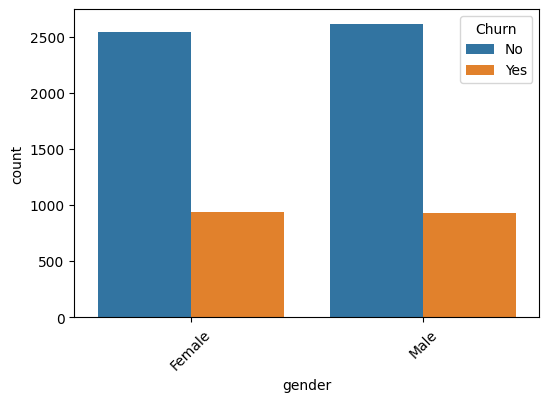

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

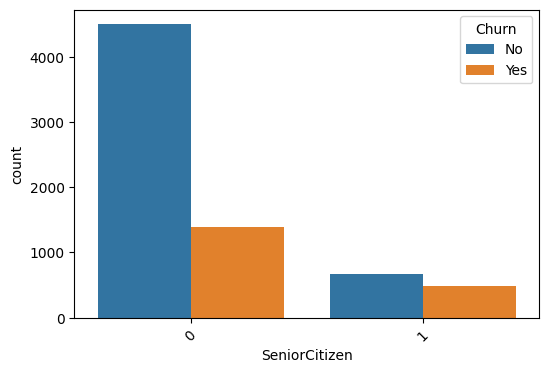

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

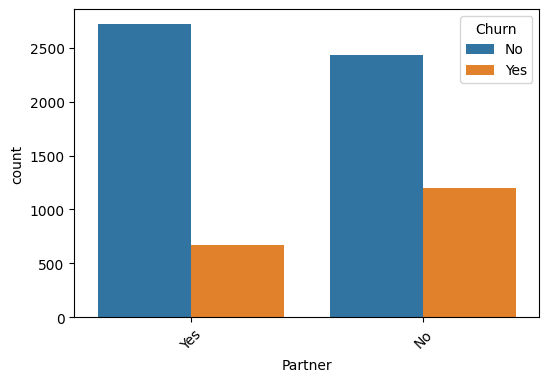

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

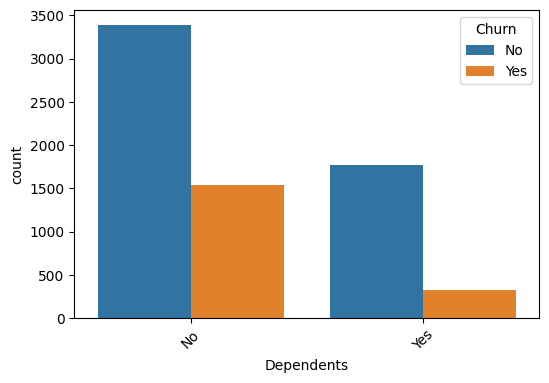

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

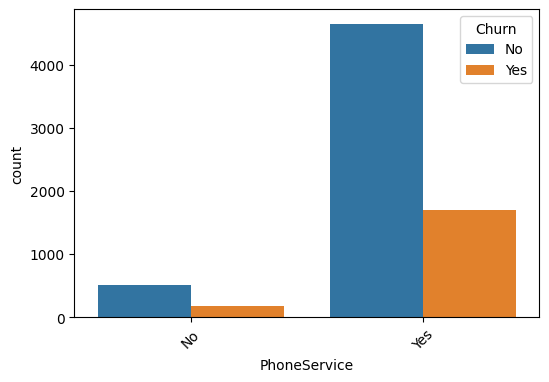

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

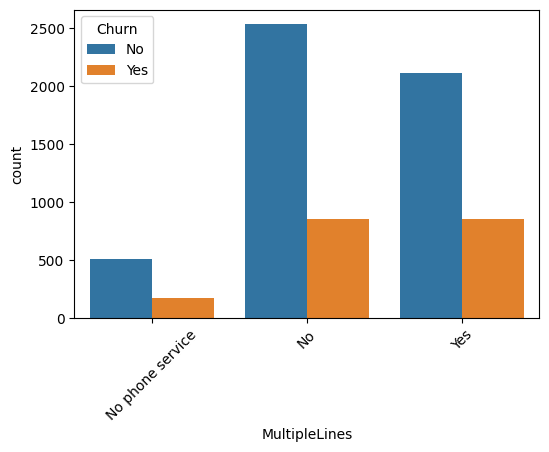

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

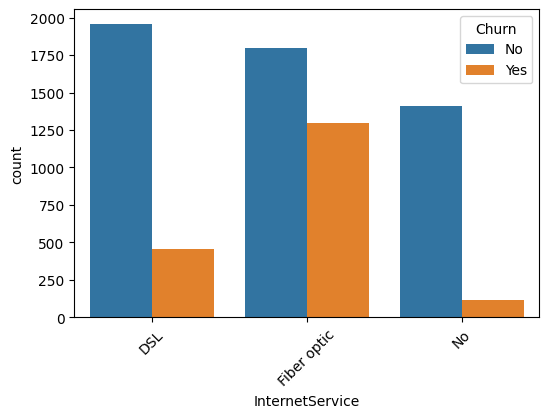

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

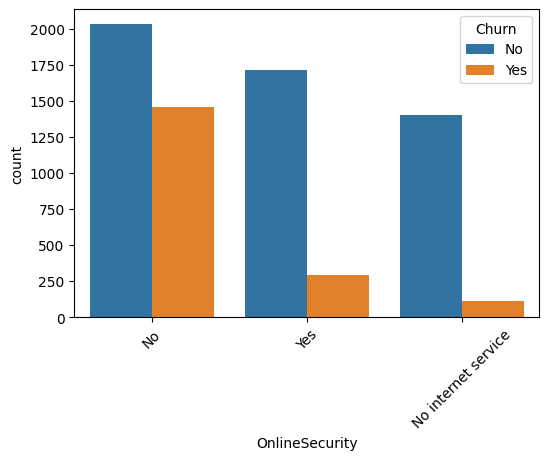

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

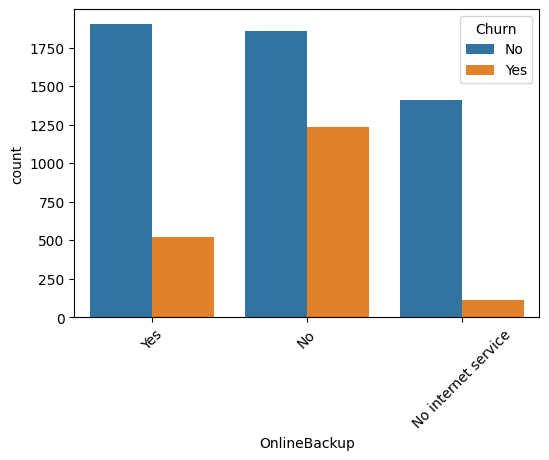

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

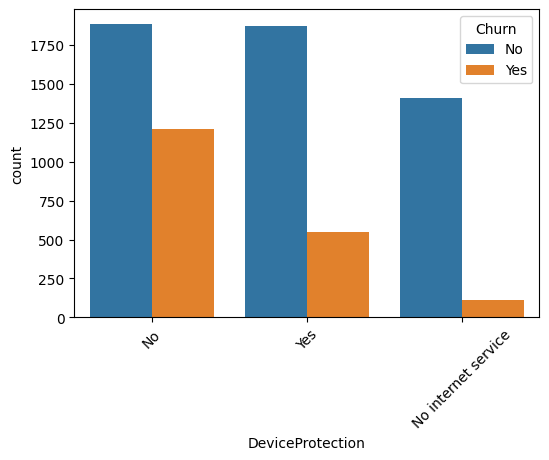

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

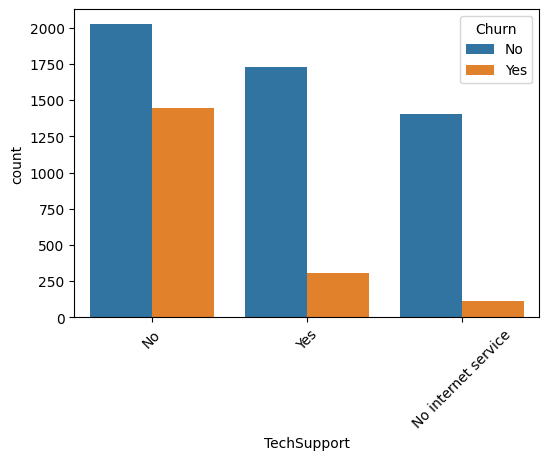

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

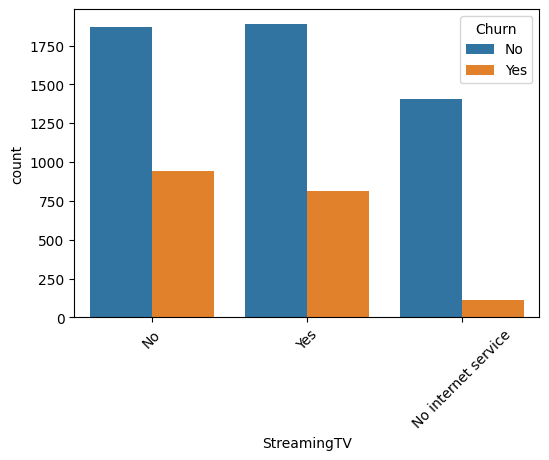

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

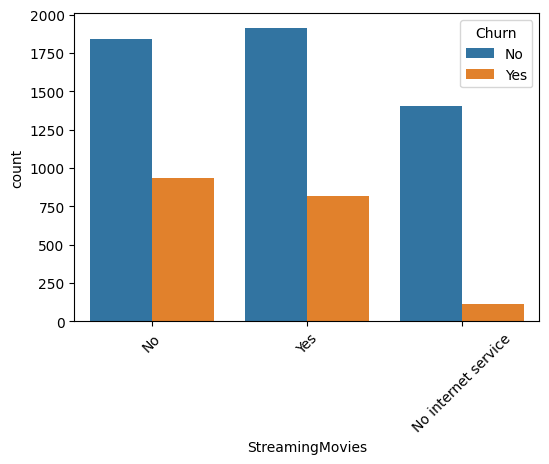

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

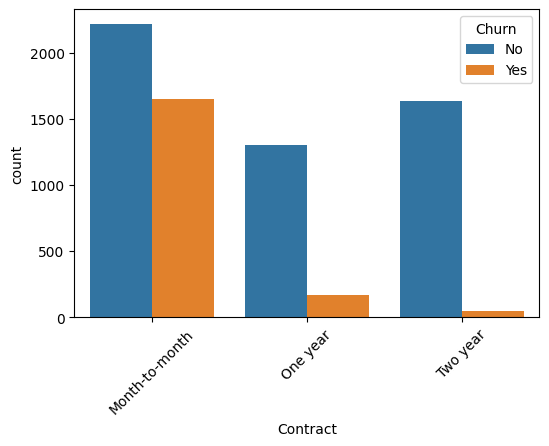

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

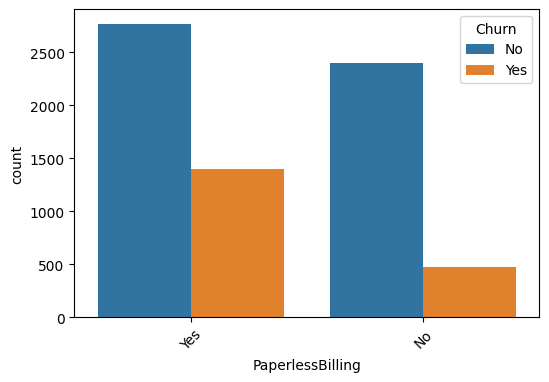

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

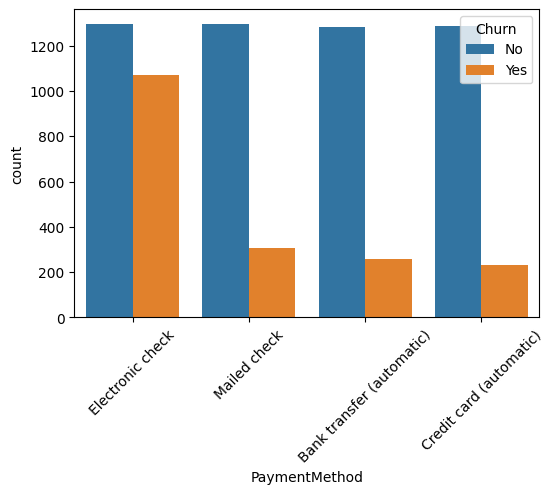

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fal

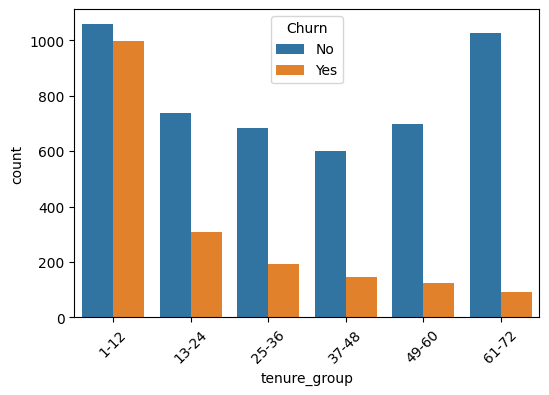

In [22]:
# Let's plot all the categorical columns individually
columns_to_drop = ["MonthlyCharges", "TotalCharges", "Churn"]

for column in newDf.drop(columns=columns_to_drop):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, hue="Churn", data=newDf)
    plt.xlabel(column)
    plt.xticks(rotation = 45)
    plt.show()

##### **Report :**

###### 1. Senior citizens are more likely to churn.
###### 2. Customers who don't have a **partner** are more likely to churn.
###### 3. Customers who don't have a **dependents** are more likely to churn.
###### 4. Customers who are using **fiber optic** are more likely to churn.
###### 5. Customers who don't have an **online security** are more likely to churn.
###### 6. Customers who don't have an **online backup** are more likely to churn.
###### 7. Customers who don't have an **Device protection** are more likely to churn.
###### 8. Customers who don't have an **tech support** are more likely to churn.
###### 9. **Streaming TV and Streaming Movies** users and non users have almost equal amount of churn rate.
###### 10. **Month to Month** contract customers have high churn rate.
###### 11. Customers who are using **paper billing** are more likely to churn.
###### 12. Customers who pays through **electronic cheque** have a highes churn ratio.
###### 13. New customers from 0 to 12 months have the churn rate of almost 50%.

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


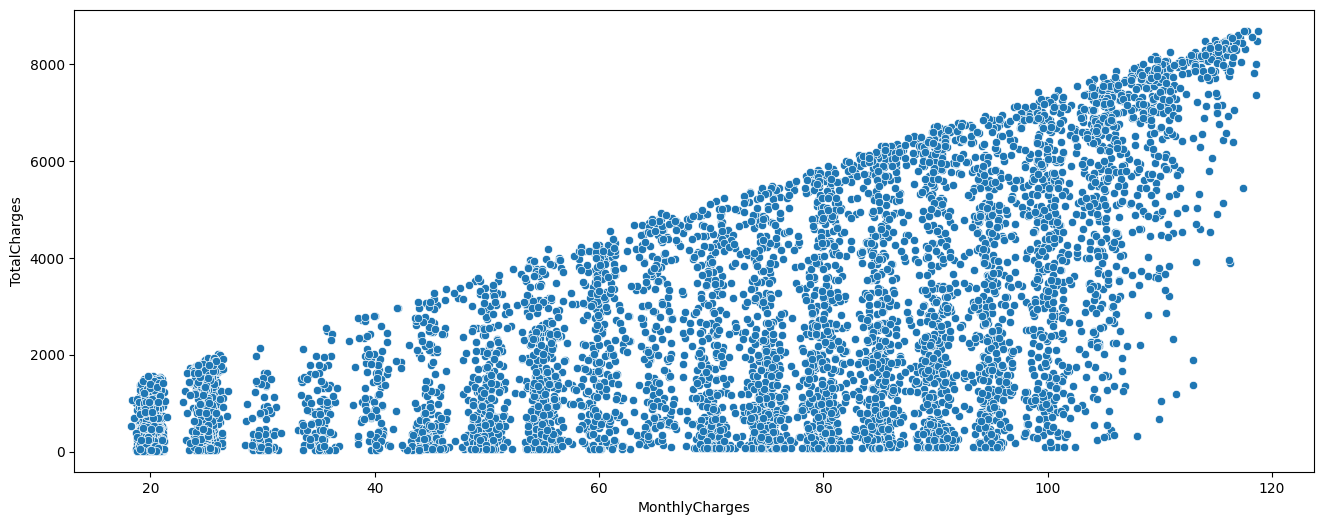

In [23]:
# Let's plot the numerical columns
plt.figure(figsize=(16, 6))
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", data=newDf)
plt.show()

##### Report : From this plot, MonthlyCharge and TotalCharges has a positive correlation. If monthly charge increases, total charge also increases.

In [24]:
# Let's find the correlation between two columns
newDf["MonthlyCharges"].corr(newDf["TotalCharges"])

0.6510648032262025

##### It has a medium correlation

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/

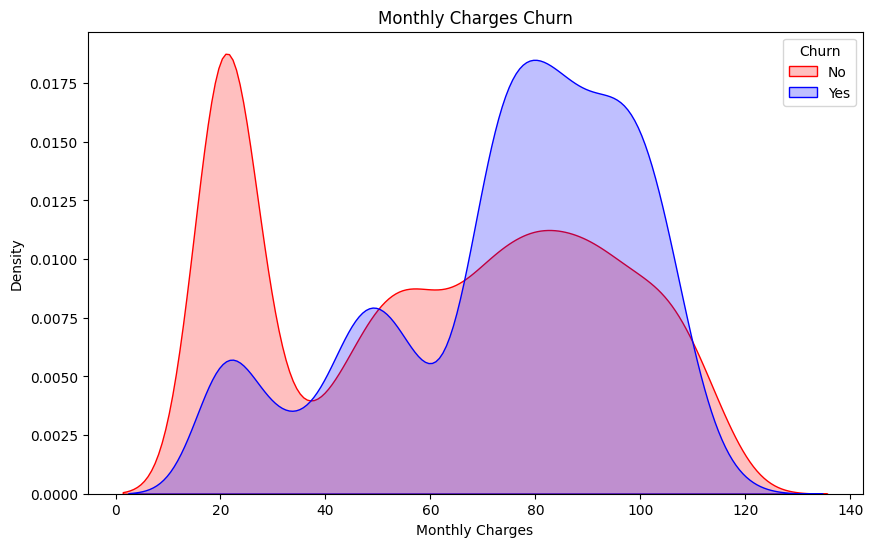

In [25]:
# Let's plot MonthlyCharges with the respect of Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(newDf['MonthlyCharges'][newDf['Churn'] == "No"], color="Red", fill=True)
sns.kdeplot(newDf['MonthlyCharges'][newDf['Churn'] == "Yes"], color="Blue", fill=True)
plt.title("Monthly Charges Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend(title = "Churn", labels = ["No", "Yes"])
plt.show()

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/

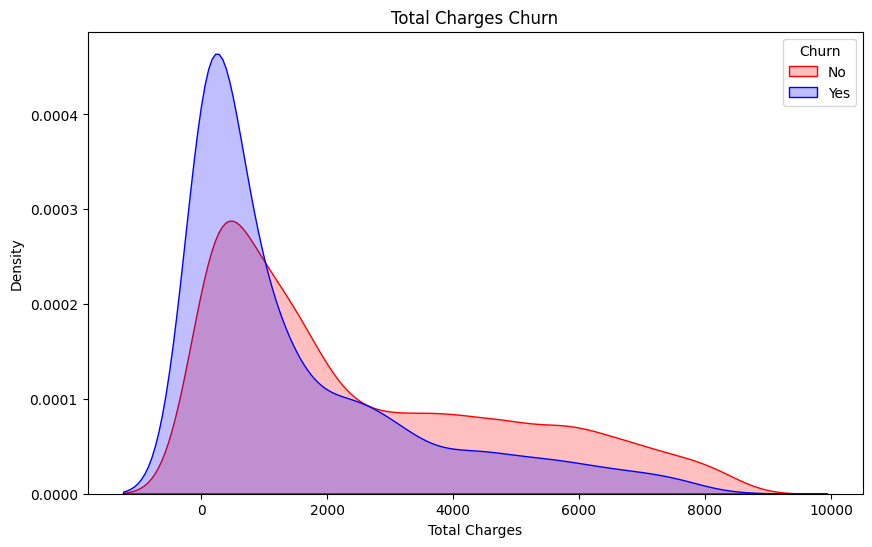

In [26]:
# Let's plot TotalCharges with the respect of Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(newDf['TotalCharges'][newDf['Churn'] == "No"], color="Red", fill=True)
sns.kdeplot(newDf['TotalCharges'][newDf['Churn'] == "Yes"], color="Blue", fill=True)
plt.title("Total Charges Churn")
plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.legend(title = "Churn", labels = ["No", "Yes"])
plt.show()

##### **Report :** High monthly charge, less tenure, less total charge have the possibility of high churning rate

# Bivariate Analysis

In [27]:
churnDf = newDf.loc[newDf["Churn"] == "Yes"]
notChurnDf = newDf.loc[newDf["Churn"] == "No"]

print(len(churnDf) , len(notChurnDf))

1869 5163


/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

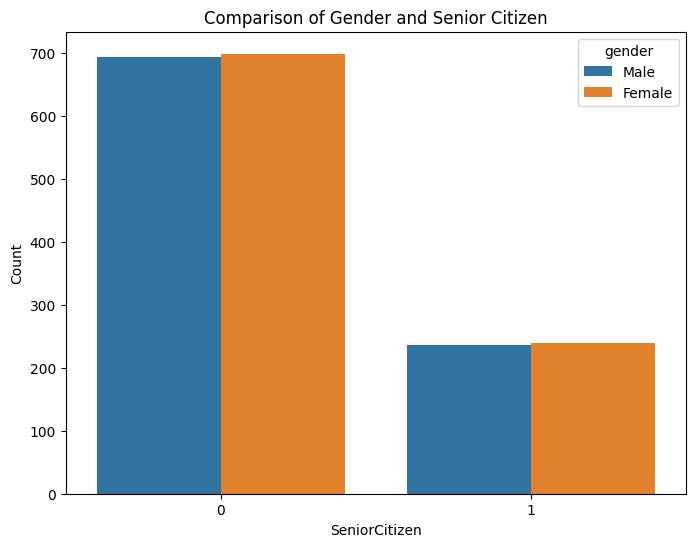

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='gender', data=churnDf)
plt.title('Comparison of Gender and Senior Citizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.show()

##### Report : Gender has no impact on senior citizen

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

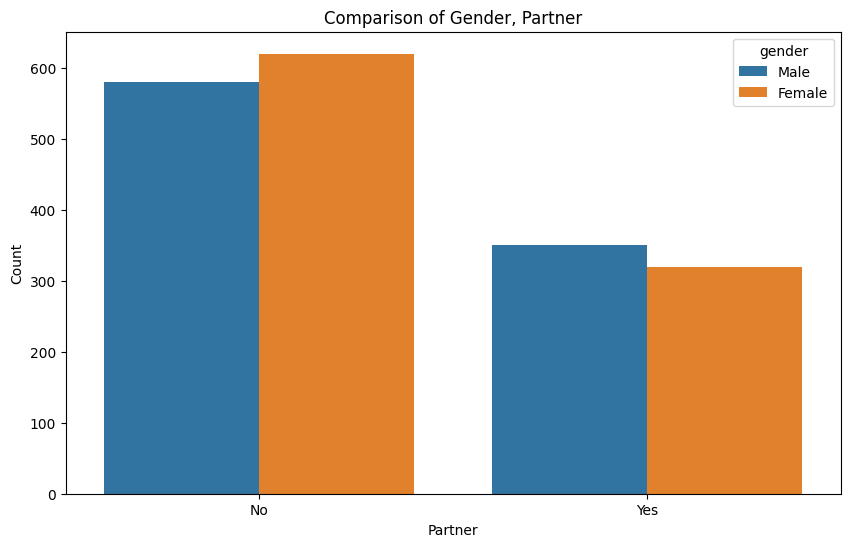

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

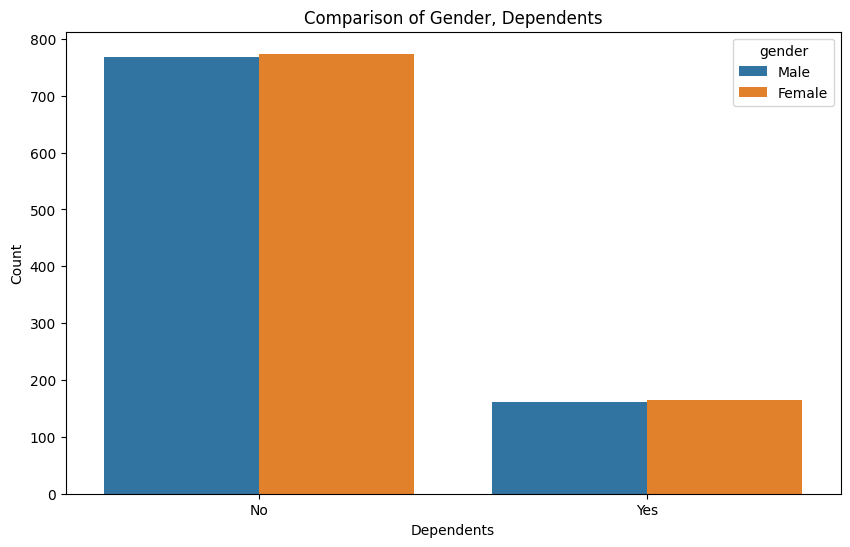

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Partner', hue='gender', data=churnDf)
plt.title('Comparison of Gender, Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Dependents', hue='gender', data=churnDf)
plt.title('Comparison of Gender, Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

##### Report : Females who don't have a partner are high likely to churn

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

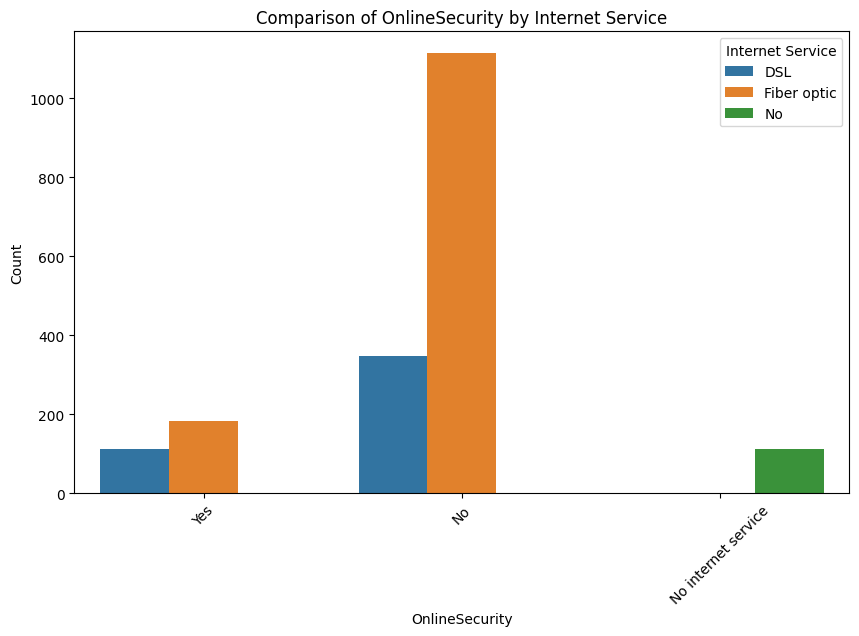

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

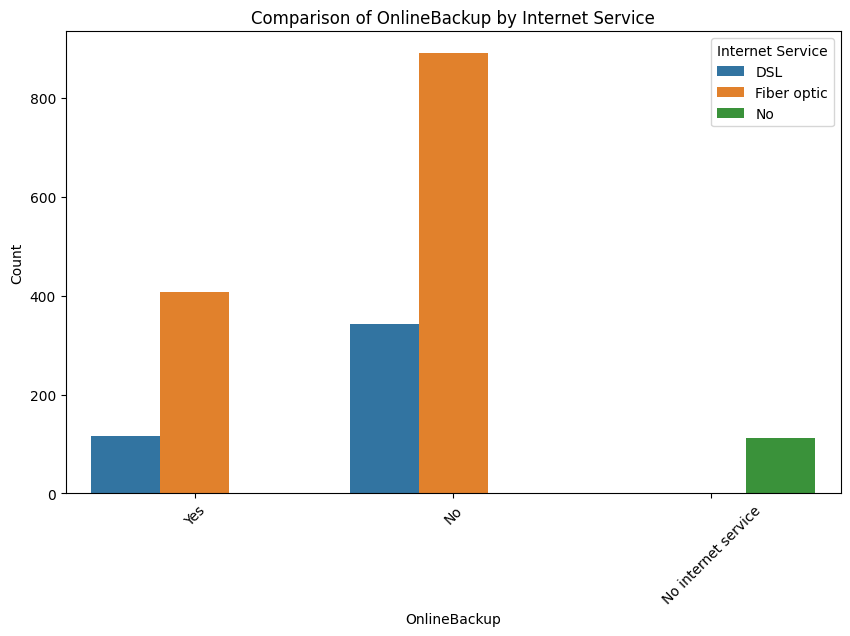

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

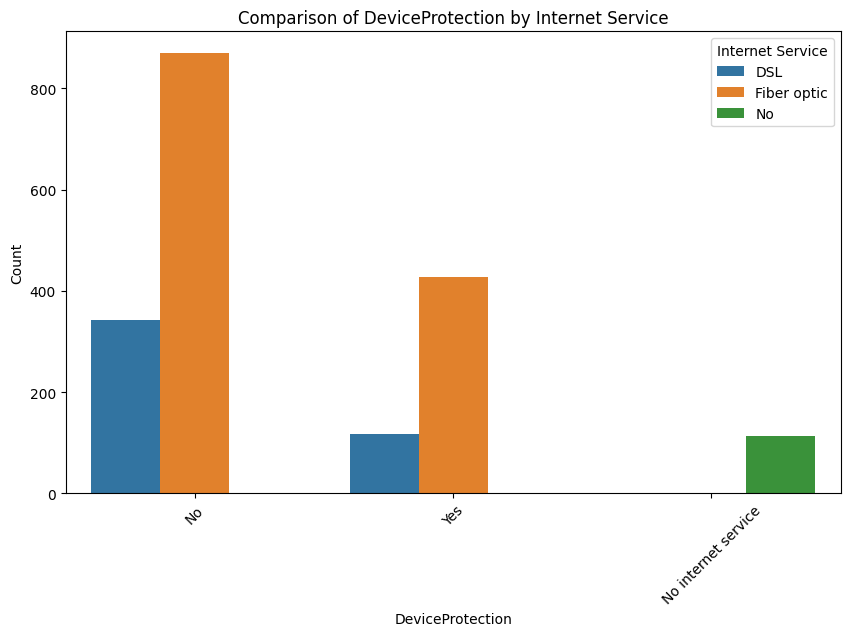

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

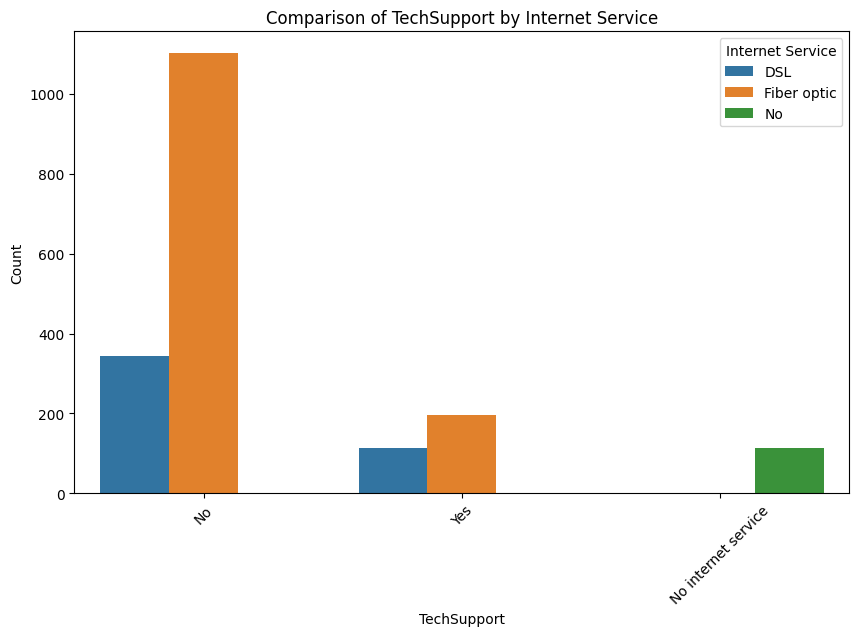

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

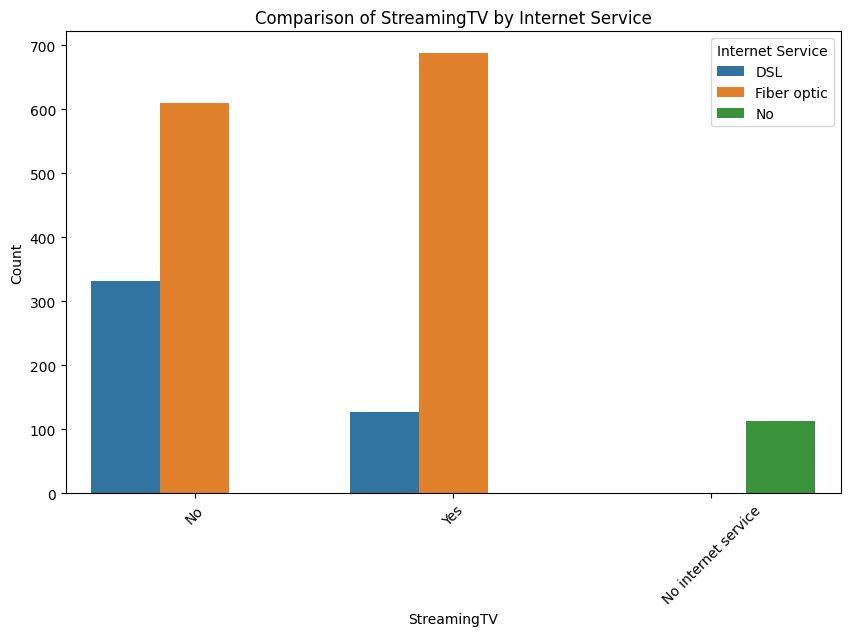

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

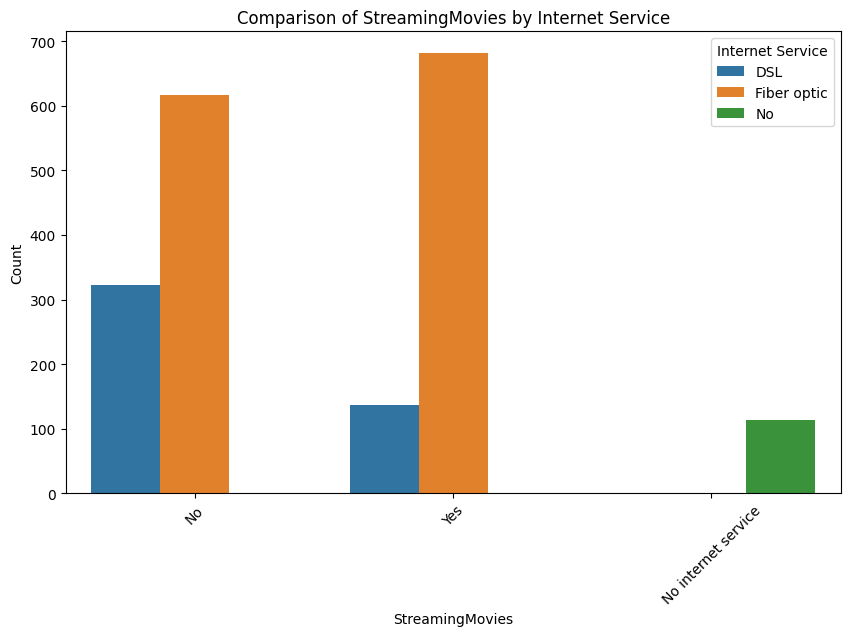

In [30]:
categorical_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='InternetService', data=churnDf)
    plt.title(f'Comparison of {column} by Internet Service')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Internet Service')
    plt.xticks(rotation=45)
    plt.show()

##### **Report :**

###### 1. Don't have online security, using fiber optic are high likely to churn.
###### --------------------------
###### 2. Don't have an online backup, using fiber optic are high likely to churn.
###### 3. Have an online backup, using fiber optic are moderately likely to churn.
###### --------------------------
###### 4. Don't have an device protection, using fiber optic are high likely to churn.
###### 5. Have an device protection, using fiber optic are moderately likely to churn.
###### --------------------------
###### 6. Don't have a tech support, using fiber optic are high likely to churn.
###### --------------------------
###### 7. Streaming TV, Streaming movies users and non users, using fiber optic are high likely to churn.

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

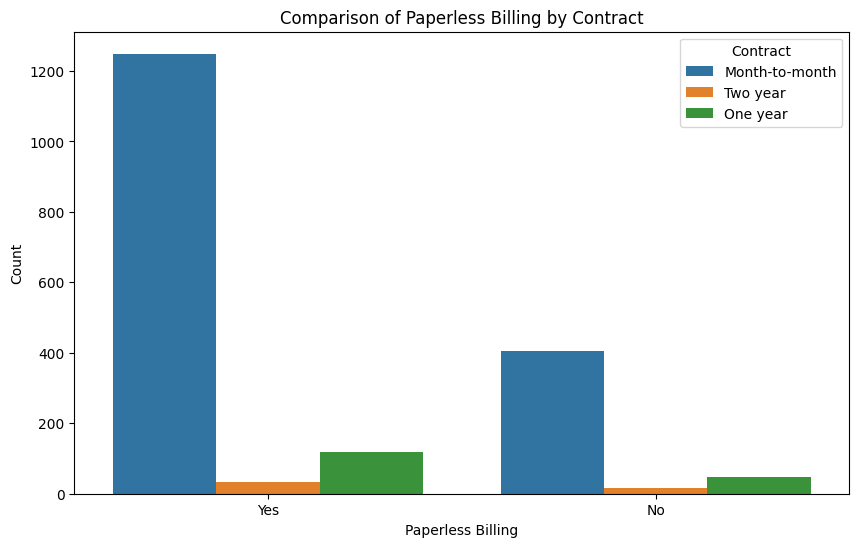

/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Churn Analysis - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Scien

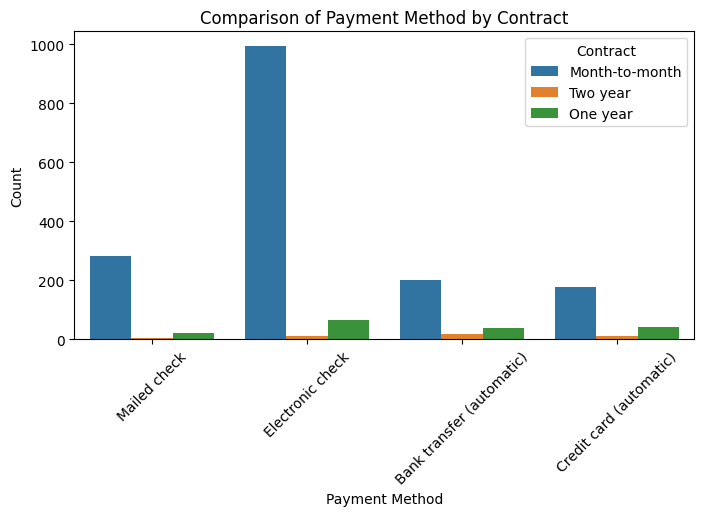

In [31]:
# Grouped bar plot for "PaperlessBilling" with "Contract" as hue
plt.figure(figsize=(10, 6))
sns.countplot(x='PaperlessBilling', hue='Contract', data=churnDf)
plt.title('Comparison of Paperless Billing by Contract')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.legend(title='Contract')
plt.show()

# Grouped bar plot for "PaymentMethod" with "Contract" as hue
plt.figure(figsize=(8, 4))
sns.countplot(x='PaymentMethod', hue='Contract', data=churnDf)
plt.title('Comparison of Payment Method by Contract')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Contract')
plt.xticks(rotation=45)
plt.show()

##### **Report :**

###### 1. Month to Month contract customers using paperless billing are more likely to churn.
###### 2. Month to Month contract customers using electronic cheque payment method are more likely to churn.

In [37]:
# Let's find the correlation of the dataframe with respect to Churn.
# First apply one hot encoding to the Churn column in order to prevent the deletion of Churn column while perform One hot encoding.

newDf["Churn"] = newDf["Churn"].replace({"Yes" : 1, "No" : 0})
newDf.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [55]:
newDfDummies = pd.get_dummies(newDf)
plt.figure(figsize=(16,6))
result = newDfDummies.astype(int).corr()["Churn"].sort_values(ascending=False)
result

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
tenure_group_1-12                          0.319816
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192922
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
tenure_group

<Figure size 1600x600 with 0 Axes>

##### **Note :** From the above correlation, I consider the values greater than 0.2 and less than -0.2 are the reasonable insights.

<Axes: >

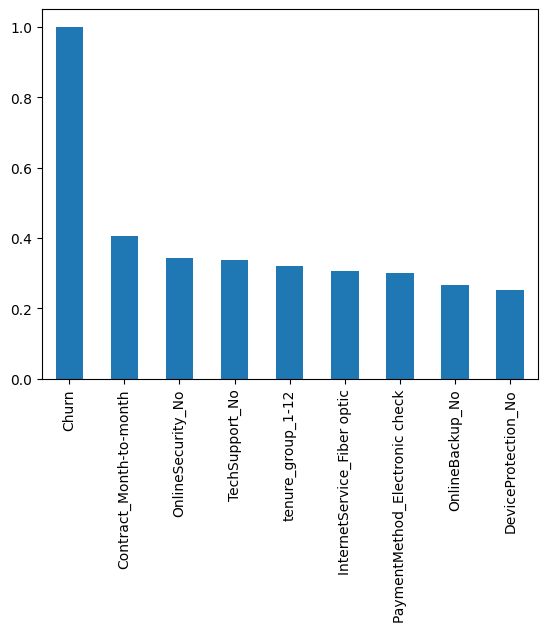

In [58]:
result[(result > 0.2)].plot(kind="bar")

<Axes: >

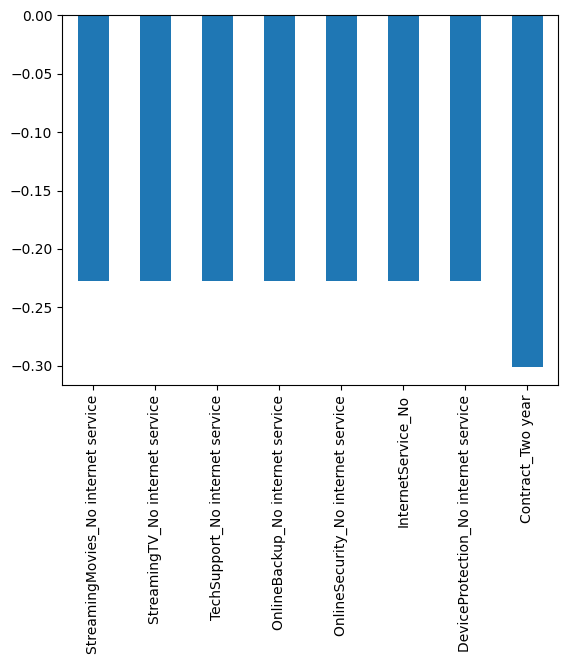

In [59]:
result[(result < -0.2)].plot(kind="bar")